In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
data=pd.read_table("SMSSpamCollection",sep='\t',header=None,names=['label','messages'])
data.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [47]:
data.shape

(5572, 2)

In [48]:
data.isnull().sum().sum()

0

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     5572 non-null   object
 1   messages  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [50]:
data.describe()

,label,messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


4825 747


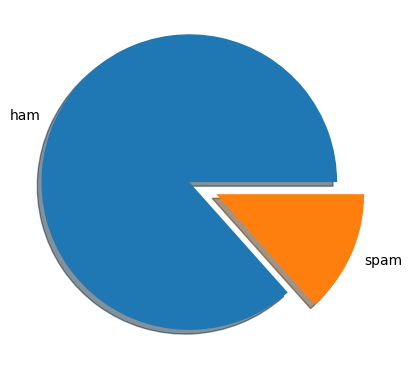

In [51]:
len_ham=len(data["label"][data.label=='ham'])
len_spam=len(data["label"][data.label=='spam'])
a=np.array([len_ham,len_spam])
labels=['ham','spam']
print(len_ham,len_spam)
plt.pie(a,labels=labels,explode=[0.2,0.0],shadow=True)
plt.show()


In [52]:
def text_preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("", "'").replace("'", "'")\
    .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
    .replace("n't"," not").replace("what's", "what is").replace("it's", "it is")\
    .replace(" 've"," have").replace("i'm", "i am").replace("'re", " are")\
    .replace("he's", "he is").replace("she's", "she is").replace("'s","own")\
    .replace("%"," percent ").replace("₹"," rupee ").replace("$", " dollar ")\
    .replace("€"," euro ").replace("'11","will")
    return x
data["Preprocessed Text"] = data["messages"].apply(lambda x: text_preprocess(x)) 
data.head()

,label,messages,Preprocessed Text
0,ham,"Go until jurong point, crazy.. Available only ...","'g'o' 'u' not'i'l' 'j'u'r'o'n'g' 'p'o'i' not',..."
1,ham,Ok lar... Joking wif u oni...,'o'k' 'l'a'r'.'.'.' 'j'o'k'i'n'g' 'w'i'f' 'u' ...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,'f'r'e'e' 'e' not'r'y' 'i'n' '2' 'a' 'w'k'l'y'...
3,ham,U dun say so early hor... U c already then say...,'u' 'd'u'n' own'a'y' own'o' 'e'a'r'l'y' 'h'o'r...
4,ham,"Nah I don't think he goes to usf, he lives aro...",'n'a'h' 'i' 'd'o'n'''t' 't'h'i'n'k' 'h'e' 'g'o...


In [53]:
print(data['messages'][0])
print('================================================')
print(data['Preprocessed Text'][0])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
'g'o' 'u' not'i'l' 'j'u'r'o'n'g' 'p'o'i' not',' 'c'r'a'z'y'.'.' 'a'v'a'i'l'a'b'l'e' 'o'n'l'y' 'i'n' 'b'u'g'iown' 'n' 'g'r'e'a't' 'w'o'r'l'd' 'l'a' 'e' 'b'u'f'f'e't'.'.'.' 'c'i'n'e' 't'h'e'r'e' 'g'o't' 'a'm'o'r'e' 'w'a't'.'.'.'


In [54]:
data['label']

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

In [55]:
data['label'] = data['label'].map({'ham': 0, 'spam': 1})
data['label']


0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5572, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(data['messages'],data['label'],random_state=1)
data.shape[0],xtrain.shape[0],xtest.shape[0]

(5572, 4179, 1393)

In [57]:

from sklearn.feature_extraction.text import CountVectorizer #Instantiate the CountVectorizer method
count_vector=CountVectorizer()
# Fit the training data and then return the matrix
training_data=count_vector.fit_transform(xtrain)
# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer() 
testing_data = count_vector.transform(xtest)

In [58]:
print("Number of NaN values in ytrain:", ytrain.isna().sum())

Number of NaN values in ytrain: 0


In [60]:

from sklearn.naive_bayes import MultinomialNB
naive_bayes=MultinomialNB()
naive_bayes.fit(training_data, ytrain)

predictions = naive_bayes.predict(testing_data)
predictions




array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score:',format (accuracy_score (ytest, predictions)))
print('Precision score:',format(precision_score (ytest, predictions)))
print('Recall score:',format (recall_score (ytest, predictions)))
print('F1 score:',format (f1_score (ytest, predictions)))

Accuracy score: 0.9885139985642498
Precision score: 0.9720670391061452
Recall score: 0.9405405405405406
F1 score: 0.9560439560439561
